# Quiz 2: Introducción a la Ciencia de Datos práctica

&emsp; **Asignatura:** Big Data. <br>
&emsp; **Profesor:** Juan Martín Londoño Zuluaga. <br>
&emsp; **Período:** 2023-II.

&emsp; **Estdiante:** <indique su nombre aquí>

Usted es un o una analista de datos contratada por una prestigiosa disquera, FULL Stars, para el análisis de lo que hace a una canción popular. A esta disquera le importa bastante este análisis, ya que quiere saber qué hace que una canción sea un éxito.

Bajo ese contexto, se le ha entregado una base de datos que cuenta con una amplia gama de variables, incluyendo variables del número de reproducciones, artistas que colaboran en ella, porcentaje de danzabilidad de la canción, entre otros. La explicación de la base de datos la puede encontrar en la [siguiente página](https://www.kaggle.com/datasets/nelgiriyewithana/top-spotify-songs-2023), la cual es, como puede encontrar, las canciones más populares en Spotify en 2023.

En ese sentido, la Junta Directiva de la disquera le hace las siguientes preguntas:



# 1. Importe de los datos

Importe los datos del archivo `spotify-2023.csv`:

In [46]:
import pandas as pd

spotify = pd.read_csv('datain/spotify-2023.csv', sep=',', encoding='latin-1')
spotify.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


# 2. Calidad de la base de datos

## 2.1. Valores perdidos

Encuentre el número y porcentaje respecto al total de los valores perdidos que tiene la base de datos:
* ¿Qué nivel de pérdida de datos se tiene?
* ¿Es significativa la pérdida de datos?
* Si sí, ¿qué estrategia propone para afrontarlo?

In [47]:
# Numero de missings
spotify.isnull().sum()

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64

In [48]:
# Numero de missings
spotify.isnull().sum()/spotify.shape[0]

track_name             0
artist(s)_name         0
artist_count           0
released_year          0
released_month         0
released_day           0
in_spotify_playlists   0
in_spotify_charts      0
streams                0
in_apple_playlists     0
in_apple_charts        0
in_deezer_playlists    0
in_deezer_charts       0
in_shazam_charts       0
bpm                    0
key                    0
mode                   0
danceability_%         0
valence_%              0
energy_%               0
acousticness_%         0
instrumentalness_%     0
liveness_%             0
speechiness_%          0
dtype: float64

## 2.2. Valores únicos

Encuentre el número de valores únicos por columna:

In [49]:
spotify.nunique()

track_name              943
artist(s)_name          645
artist_count              8
released_year            50
released_month           12
released_day             31
in_spotify_playlists    879
in_spotify_charts        82
streams                 949
in_apple_playlists      234
in_apple_charts         172
in_deezer_playlists     348
in_deezer_charts         34
in_shazam_charts        198
bpm                     124
key                      11
mode                      2
danceability_%           72
valence_%                94
energy_%                 80
acousticness_%           98
instrumentalness_%       39
liveness_%               68
speechiness_%            48
dtype: int64

In [50]:
for col in spotify.columns:
    print("Columna: " + col + "\n")
    print(spotify[col].unique())
    print("\n")

Columna: track_name

['Seven (feat. Latto) (Explicit Ver.)' 'LALA' 'vampire' 'Cruel Summer'
 'WHERE SHE GOES' 'Sprinter' 'Ella Baila Sola' 'Columbia' 'fukumean'
 'La Bebe - Remix' 'un x100to' 'Super Shy' 'Flowers' 'Daylight'
 'As It Was' 'Kill Bill' 'Cupid - Twin Ver.'
 'What Was I Made For? [From The Motion Picture "Barbie"]' 'Classy 101'
 'Like Crazy' 'LADY GAGA'
 'I Can See You (Taylorï¿½ï¿½ï¿½s Version) (From The ' 'I Wanna Be Yours'
 'Peso Pluma: Bzrp Music Sessions, Vol. 55'
 'Popular (with Playboi Carti & Madonna) - The Idol Vol. 1 (Music from the HBO Original Series)'
 'SABOR FRESA' 'Calm Down (with Selena Gomez)' 'MOJABI GHOST' 'Last Night'
 'Dance The Night (From Barbie The Album)' 'Rush' 'TULUM' "Creepin'"
 'Anti-Hero' 'TQG' 'Los del Espacio' 'Frï¿½ï¿½gil (feat. Grupo Front'
 'Blank Space' 'Style' 'TQM' 'El Azul'
 'Sunflower - Spider-Man: Into the Spider-Verse' "I'm Good (Blue)"
 'See You Again' 'Barbie World (with Aqua) [From Barbie The Album]'
 'Angels Like You' "I Ain't W

Revise bien la columna `artist(s)_name`, ¿qué puede observar en dicha columna que pueda afectar algunos de sus análisis? No haga ningún cambio, pero analice qué está ocurriendo que podría afectar el top de artistas con mayor número de canciones en los listados top de Spotify:

# 3. Análisis Univariado



La Junta Directiva de la Disquera quisiera saber un par de cosas en términos generales sobre el top de canciones de Spotify. Le preguntan lo siguiente:
1. ¿Cuál es el o la artista que más canciones ha tenido en el Top de Spotify (variable `artist(s)_name`)?
2. Muestre en un gráfico de barras o histograma la distribución del año de lanzamiento de las canciones desde el 2020 (variable `released_year`): ¿las canciones más recientes tienen más exito que aquellas más viejas?
3. Realice un boxplot del número de reproducciones de las canciones (variable `streams`): utilizando el criterio de 1.5 veces el rango intercuartílico sobre el quantil 75 (el mismo criterio que utiliza el boxplot), ¿hay valores atípicos? ¿Cuántos datos atípicos existen?


In [296]:
# Artista con mayor numero de reproducciones
artist = spotify["artist(s)_name"].value_counts().index[0]
print(f'La artista con mayor número de canciones en el top de Spotify 2023 es {artist}.')

La artista con mayor número de canciones en el top de Spotify 2023 es Taylor Swift.


c:\Users\juanm\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


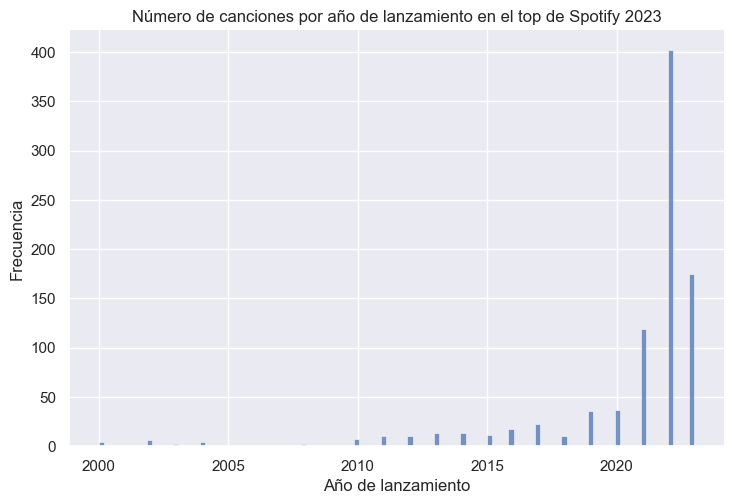

In [297]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot de la distribucion de streams
sns.displot(data = spotify[spotify.released_year >=2000], x = 'released_year',
            height = 5, aspect=1.5)
plt.xlabel('Año de lanzamiento');plt.ylabel('Frecuencia')
plt.title('Número de canciones por año de lanzamiento en el top de Spotify 2023')
plt.show()

Hay 74 canciones con reproducciones atípicas


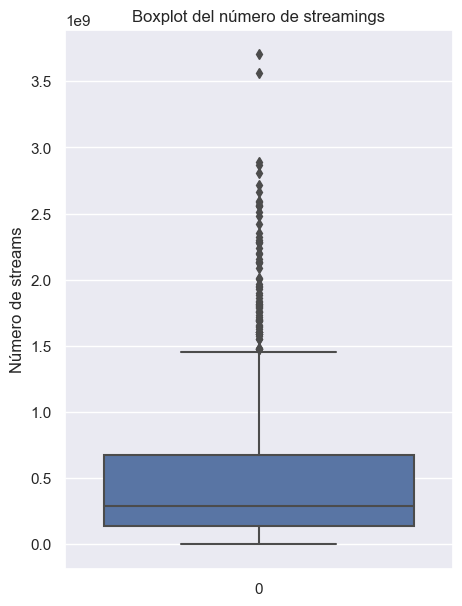

El top 25 de canciones con mayor reproducciones atípicas son las siguientes: 



,track_name,artist(s)_name
0,Blinding Lights,The Weeknd
1,Shape of You,Ed Sheeran
2,Someone You Loved,Lewis Capaldi
3,Dance Monkey,Tones and I
4,Sunflower - Spider-Man: Into the Spider-Verse,"Post Malone, Swae Lee"
5,One Dance,"Drake, WizKid, Kyla"
6,STAY (with Justin Bieber),"Justin Bieber, The Kid Laroi"
7,Believer,Imagine Dragons
8,Closer,"The Chainsmokers, Halsey"
9,Starboy,"The Weeknd, Daft Punk"


In [176]:
import seaborn as sns
import numpy as np

# Boxplot
plt.figure(figsize = (5, 7))
sns.boxplot(pd.to_numeric(spotify['streams'], errors = 'coerce'))
plt.ylabel('Número de streams')
plt.title('Boxplot del número de streamings')

spotify['streams'] = pd.to_numeric(spotify['streams'], errors = 'coerce')

# Datos atipicos
q75 = np.nanquantile(spotify['streams'], q = 0.75)
q25 = np.nanquantile(spotify['streams'], q = 0.25)

iqr = q75 - q25

print(f"Hay {spotify[spotify['streams'] >= q75 + iqr*1.5].shape[0]} canciones con reproducciones atípicas")

plt.show()

names = spotify[spotify['streams'] >= q75 + iqr*1.5].sort_values('streams', ascending = False).head(25).reset_index()
print(f"El top 25 de canciones con mayor reproducciones atípicas son las siguientes: \n")
names[['track_name', 'artist(s)_name']]

# 4. Análisis multivariado

La Junta Directiva quiere saber un poco más. Es decir, ya sabe que hay unas canciones que son un éxito total. Tanto, que se salen de la distribución del top de Spotify. Es decir, hay un top del top. Ellos están interesados en qué hacen este tipo de canciones para ser un éxito rotundo.

En ese sentido, le hacen las siguientes preguntas:

1. ¿Cuáles son el top 10 de canciones más reproducidas en el 2023 (variable `track_name` y `streams`)? ¿Qué artista tiene más canciones en el top 10?
    - Para esto, realice un gráfico de barras que demuestre el top 10 de canciones con mayor reproducción.
2. ¿Existe un mes particular (`released_mont`) en el que se hayan lanzado las mejores canciones de Spotify del 2023? ¿Se mantiene este comportamiento para las 100 canciones más exitosas? Si sí, ¿por qué? Si no, ¿por qué?
    - Para este caso puede realizar una tabla simple del mes y el top 100 de canciones por `streams`.
3. ¿Cuáles son la variables con mayor correlación positiva y cuáles son las que presentan una mayor correlación negativa con el número de reproducciones (`streams`)?
4. Complemente el análisis anterior con gráficas.
    - Para este caso, realice un gráfico de dispersión entre el número de reproducciones (`streams`) y el número de playlist de Spotify en el que se encuentra (`in_spotify_playlists`), porcentaje de danzabilidad (`danceability_%`), porcentaje de instrumentalización de la canción (`speechiness_%`) y cuántos artistas participan (`artist_count`). Analice si alguna es importante para explicar el éxito del top 25 de canciones.

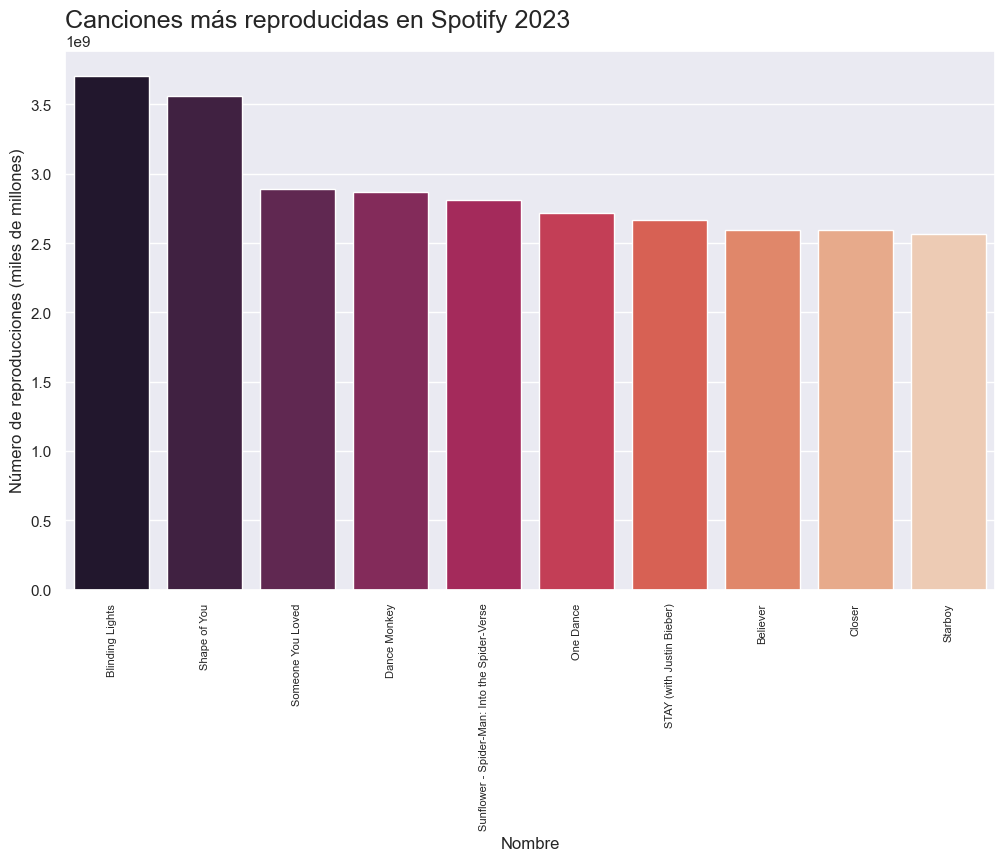

In [179]:
# Barplot de las canciones mas reproducidas en 2023
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.float_format', lambda x: '%.0f' % x)

table = (
    spotify[['track_name', 'streams']]
    .assign(streams = pd.to_numeric(spotify['streams'], errors='coerce'))
    .sort_values('streams', ascending = False)
    .head(10)
)

# Grafica
plt.figure(figsize = (12, 7))

sns.barplot(data = table, x = 'track_name', y = 'streams', palette = sns.color_palette("rocket", 10))

plt.xticks(size = 8, rotation = 90)

plt.title('Canciones más reproducidas en Spotify 2023', size = 18, loc = 'left')
plt.xlabel('Nombre', size = 12)
plt.ylabel('Número de reproducciones (miles de millones)', size = 12)

plt.show()

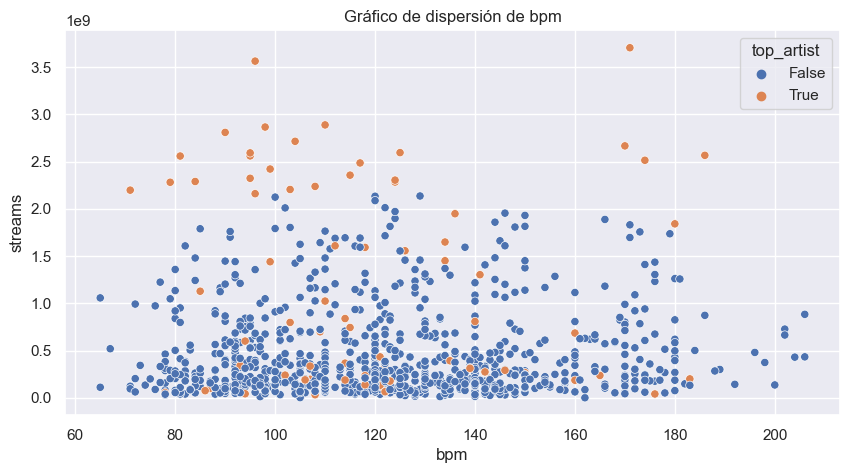

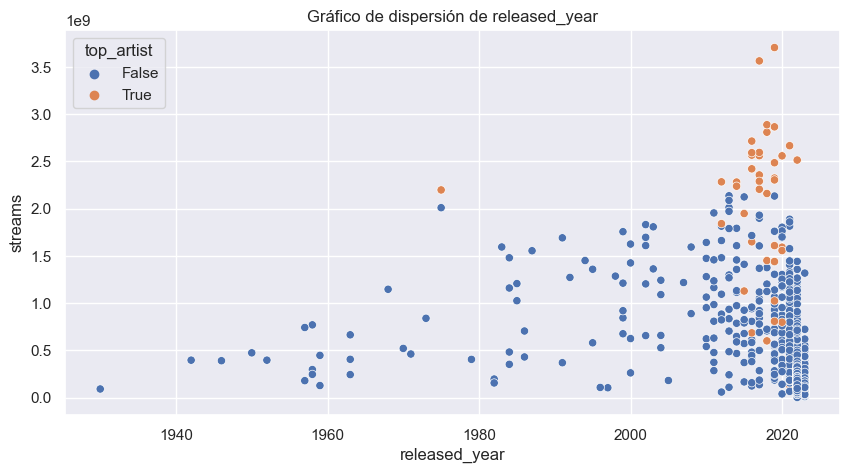

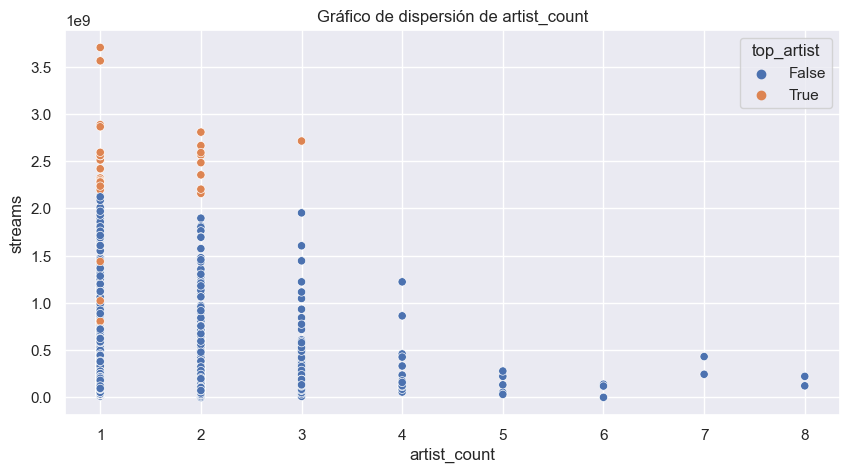

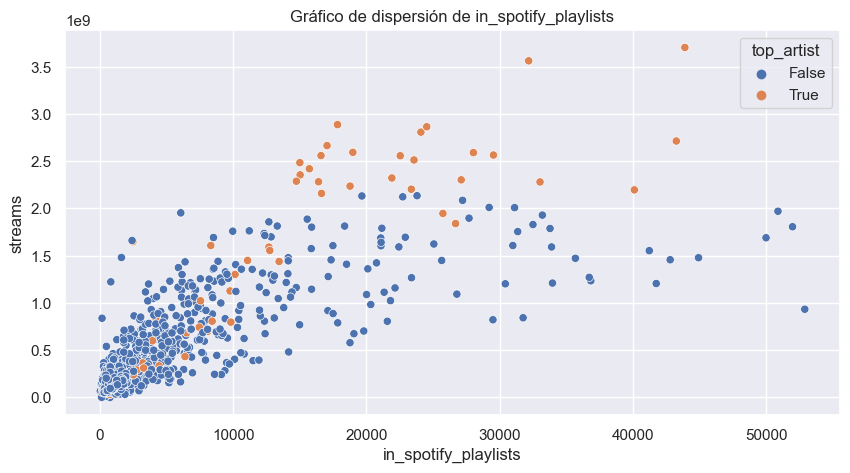

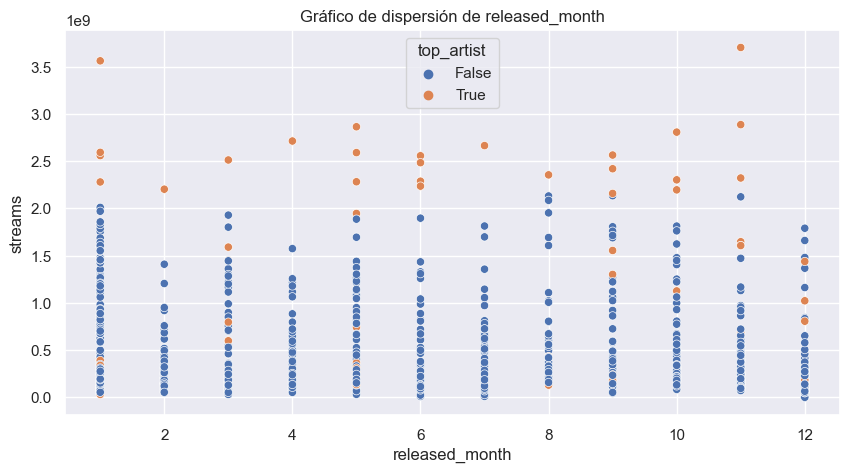

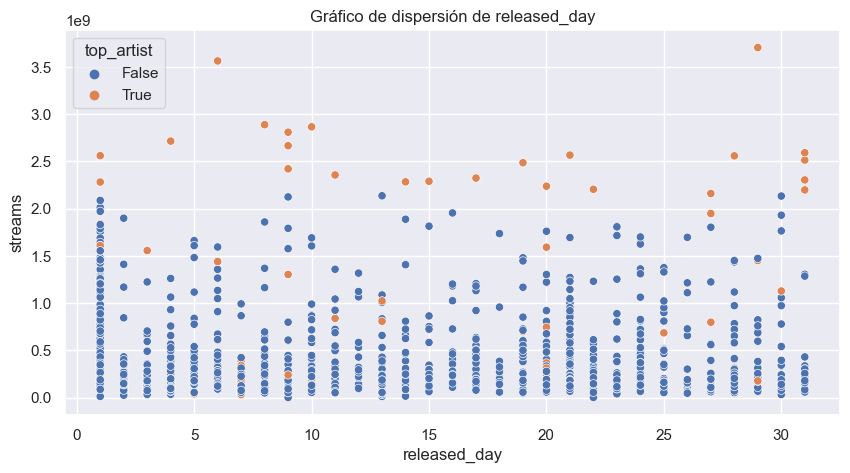

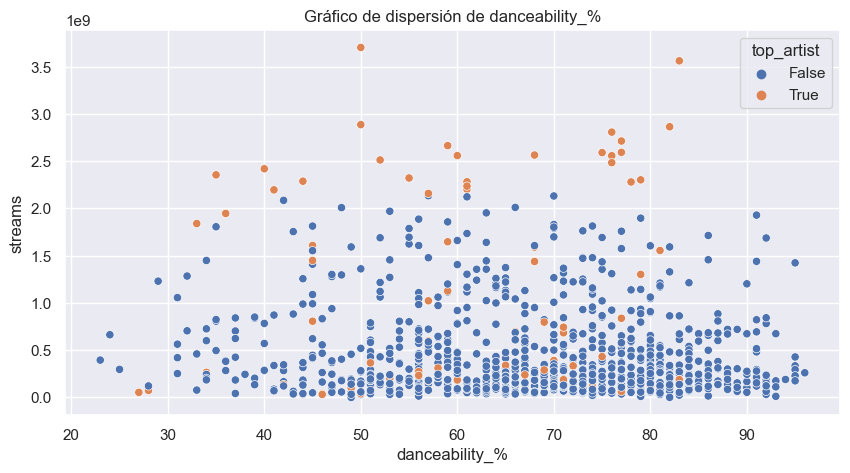

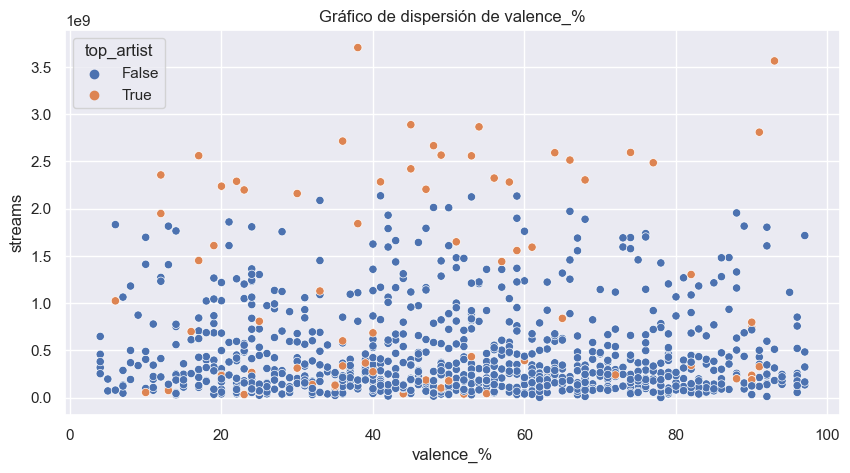

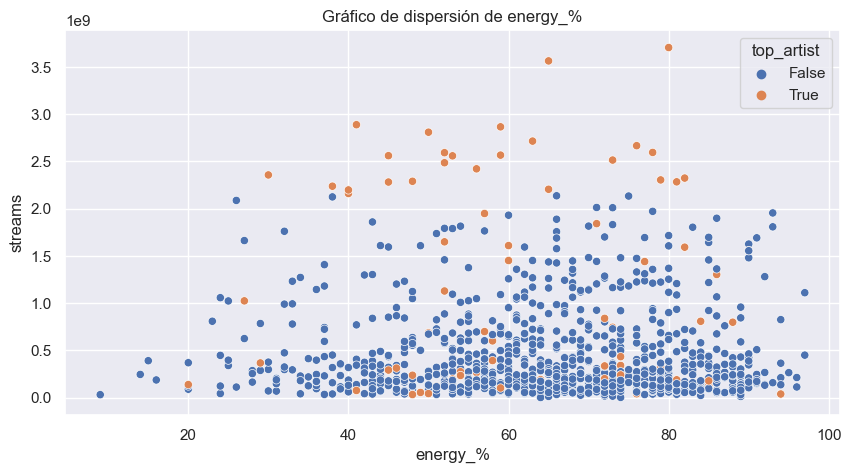

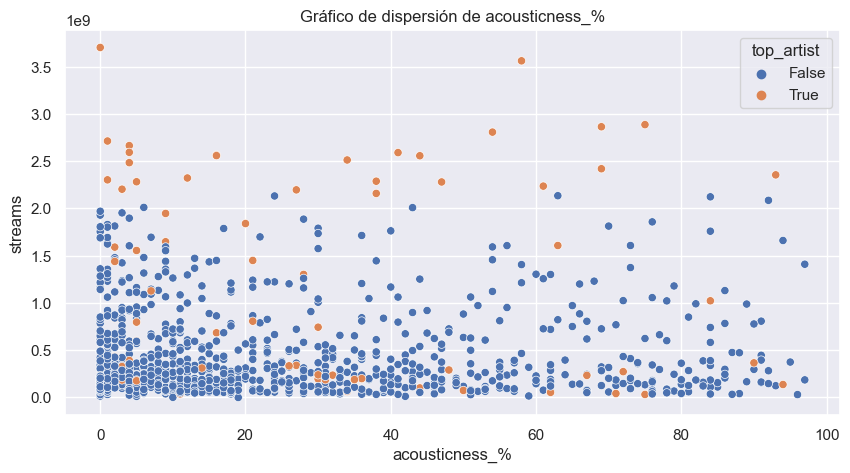

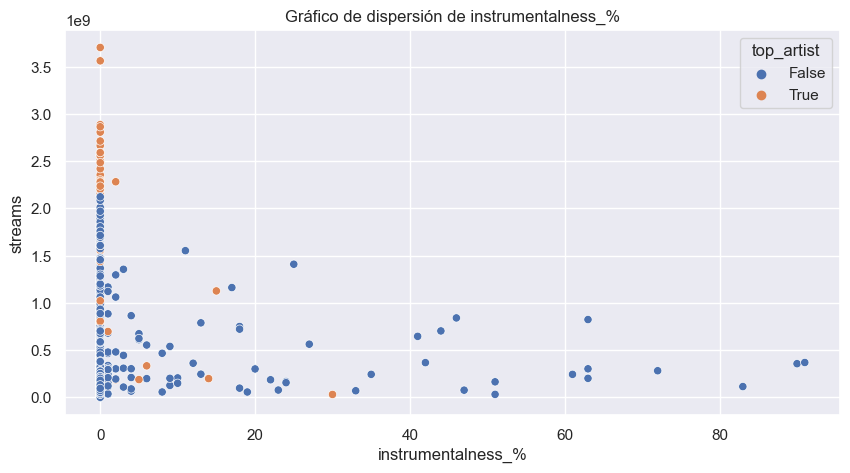

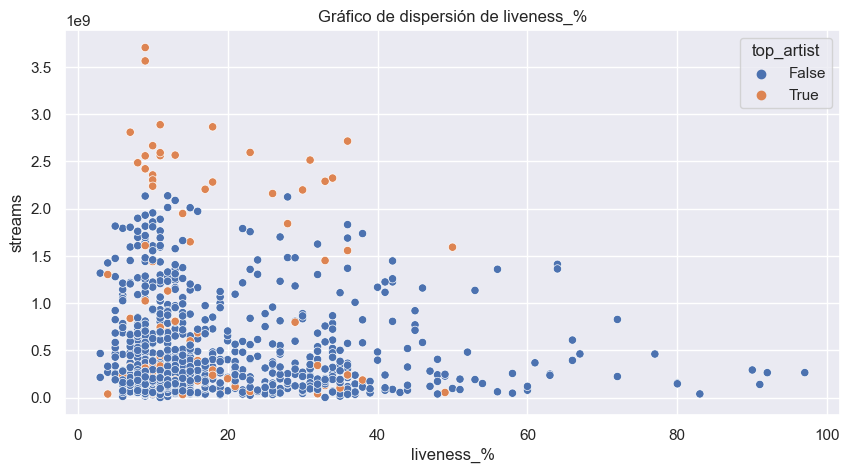

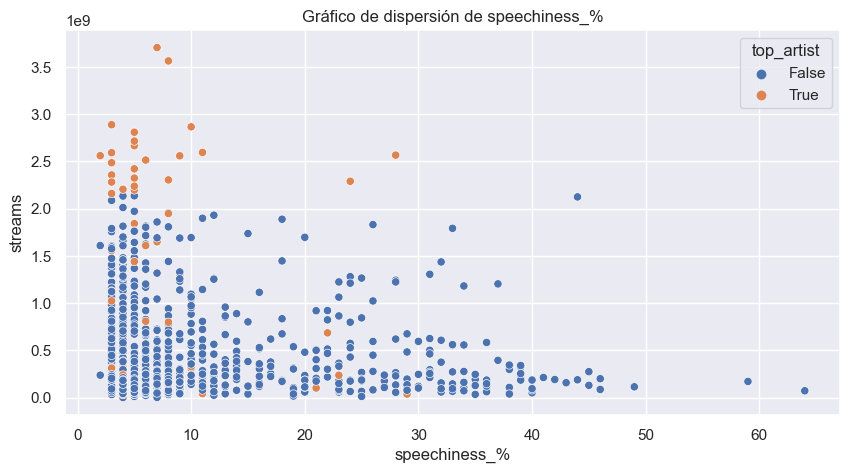

In [337]:
# Variable top 25 canciones
minimo_top25 = spotify['streams'].sort_values(ascending = False).head(25).min()
spotify['top_25'] = np.where(spotify['streams'] >= minimo_top25, True, False)

# Variable de artistas top
minimo_top = spotify['streams'].sort_values(ascending = False).head(25).min()
top_artist = spotify[spotify['streams'] >= minimo_top]['artist(s)_name'].unique()
spotify['top_artist'] = np.where(spotify['artist(s)_name'].isin(top_artist), True, False)

# Variables a revisar
var_list = ['bpm', 'released_year', 'artist_count', 'in_spotify_playlists', 'released_month', 'released_day', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']

# Ciclo de graicas
for var in var_list:
    sns.scatterplot(data = spotify, y = 'streams', x = var, hue = 'top_artist')
    plt.title('Gráfico de dispersión de ' + var)
    plt.show()

In [358]:
# Variable top 25 canciones
minimo_top100 = spotify['streams'].sort_values(ascending = False).head(100).min()
spotify['top_100'] = np.where(spotify['streams'] >= minimo_top100, True, False)

table_total = (
    spotify['released_month']
    .value_counts()
)

print('='*64)
print('Los meses con mayor número de canciones en el top son:\n', table_total)
print('='*64 + '\n')

table_100 = (
    spotify[spotify['top_100'] == True]['released_month']
    .value_counts()
)

print('='*64)
print('Los meses con mayor número de canciones en el top 100 son:\n', table_100)
print('='*64)

Los meses con mayor número de canciones en el top son:
 released_month
1     134
5     128
3      86
6      86
11     80
12     75
10     73
4      66
7      62
2      61
9      56
8      46
Name: count, dtype: int64

Los meses con mayor número de canciones en el top 100 son:
 released_month
1     26
9     11
3      9
10     9
5      9
11     8
6      8
8      6
7      5
12     5
4      2
2      2
Name: count, dtype: int64


In [373]:
pd.set_option('display.float_format', lambda x: '%.4f' % x)

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

# Variable de artistas top
minimo_top = spotify['streams'].sort_values(ascending = False).head(25).min()
top_artist = spotify[spotify['streams'] >= minimo_top]['artist(s)_name'].unique()
spotify['top_artist'] = np.where(spotify['artist(s)_name'].isin(top_artist), 1, 0)


spotify.select_dtypes(include=numerics).corr()['streams'].sort_values(ascending = False)

streams                 1.0000
in_spotify_playlists    0.7898
in_apple_playlists      0.7721
in_deezer_playlists     0.7460
top_artist              0.3639
in_apple_charts         0.3202
in_spotify_charts       0.2458
in_deezer_charts        0.2286
in_shazam_charts        0.0569
released_day            0.0106
bpm                    -0.0024
acousticness_%         -0.0045
released_month         -0.0249
energy_%               -0.0261
valence_%              -0.0408
instrumentalness_%     -0.0449
liveness_%             -0.0483
danceability_%         -0.1055
speechiness_%          -0.1123
artist_count           -0.1365
released_year          -0.2308
Name: streams, dtype: float64

# 5. Recomendaciones

A partir de lo anterior, ¿qué puede recomendarle a la Junta Directiva de la disquera para obtener un éxito rotundo?